# Basic Machine Learning

Machine Learning Tasks

* Supervised
  * Regression
  * Classification
  * Localization
  * Object Detection
  * Semantic Segmentation
  * Instance Segmentation
* Unsupervised
  * Clustering

![image.png](pic1.png)

Learn more at: [Hands-On Machine Learning with Agricultural Applications](https://www.ag2pi.org/workshops-and-activities/workshop-2022-02/)

## Packages

* Scipy
* Sklearn

---

## Linear Regression 

* what 
  * Fit a line through some points
* why
  * Find relations between independen and dependent variables.
  * We have low resolution data points and want to query on the missing parts.

## R-squared

* Goodness of fit
* percentage of the variance in the dependent variable that the independent variables explain collectively

$R^2 = \frac{variance\:explained\:by\:the\:model}{total\:variance}$

In [8]:
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import random

In [ ]:
n = 50
rng = np.random.default_rng()
x = rng.random(n)
y = 1.6*x + rng.random(n)

print(x)
print(y)

### Linear Regression Formula

$y = a \times x + b$

In [ ]:
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")

plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

## Nonlinear Regression

* Nonlinear function between dependent and independent variables
    * Nonlinear operations (multiplication, power, etc.) between independent variables.
* Polynomial fitting
* polynomial regression is a linear model used for describing non-linear relationships.
    * Use the notion of the kernel
    * Define fixed nonlinear terms (powers and multiplications)
    * Transform input into the kernel/features space
    * Relation between coefficients and Nonlinear terms become linear
    * Can solve using a linear regressor

<img src="fig1.png" alt="drawing" width="500"/></br>
<!-- ![image.png](fig1.png) -->

<img src="fig2.png" alt="drawing" width="500"/></br>
<!-- ![image.png](fig2.png) -->

<img src="fig3.png" alt="drawing" width="500"/></br>
<!-- ![image.png](fig3.png) -->


In [ ]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.figure(figsize=(10,6))
plt.scatter(x, y, label='original data')
plt.legend()
plt.show()

## Polynomial Fitting Formula

$y = \sum_{i=0}^{n} a_i\times x^i$

Where $x^i$ s are the features and $a_i$ s are the corresponding coefficients we are looking for. 

### Linear Regression Formula (Recap)

$y = a \times x^1 + b \times x^0$

In [ ]:
poly = PolynomialFeatures(degree=12, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

y_predicted = poly_reg_model.predict(poly_features)

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y, label='original data')
plt.plot(x, y_predicted, c="red", label='fitter polynomial')
plt.legend()
plt.show()

## Example

AZMET air temperature data

In [ ]:
data = pd.read_csv('data.csv')
data

In [ ]:
data_parsed = data.to_numpy()

plt.figure(figsize=(10,6))
plt.scatter(data_parsed[:,0], data_parsed[:,1], label='original data')
plt.legend()
plt.show()

In [ ]:
x = data_parsed[:,0]
y = data_parsed[:,1]

poly = PolynomialFeatures(degree=6, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

y_predicted = poly_reg_model.predict(poly_features)

print(poly_reg_model.predict(poly.fit_transform([[7.4]])))

plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y, label='original data')
plt.plot(x, y_predicted, c="red", label='fitter polynomial')
plt.legend()
plt.show()

## Overfitting

In [ ]:
x = np.arange(-10, 10)
y = -2*x**3+9*x**2+5*x

noise_fac = 5000
noise = noise_fac*np.random.random(x.shape[0])-noise_fac/2

y_noisy = y+noise

plt.figure(figsize=(10,6))
plt.scatter(x, y_noisy, label='original data')
plt.plot(x, y, c="green", label='generative polynomial')
plt.legend()
plt.show()

In [ ]:
deg = 4

poly = PolynomialFeatures(degree=deg, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_noisy)

y_predicted = poly_reg_model.predict(poly_features)

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y_noisy, label='original data')
plt.plot(x, y, c="green", label='generative polynomial')
plt.plot(x, y_predicted, c="red", label='fitted polynomial')
plt.legend()
plt.show()

# Clustering

Grouping data points into different clusters. Different clustering approaches and methods. 

* Hierarchical clustering
  * Merging clusters
* Centroid-based clustering
  * Recomputing center of the clusters iteratively
  * K-Means
* Distribution-based clustering
  * Fit distribution models using Expectation Maximization (EM)
* Density-based clustering
  * Points in dense areas will be put into a cluster
  * Points in non-dense are considered as outliers
  * Merging approach is used
  * DBSCAN
* Grid-based clustering
  * For high dimensional spaces
  * Break space into cells

### K-Means

An example of centroid-based clustering. Also implements EM algorithm.
Here are the steps:

* Determine the number of clusters (k).
* Randomly choose k data points as centroids.
* Iterate until convergence: 
  * Calculate sum of squared distances between all the points and each cluster.
  * Assign each point to the closest cluster. 
  * Compute the centroids by averaging the assigned points to each cluster. 

</br>

![clustering](clustering.gif)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


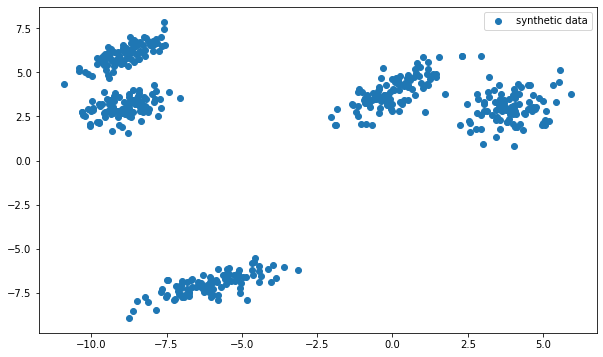

In [43]:

k = 5
n_k = 100

data = np.zeros((k*n_k,2))

for i in range(k):
    data[i*n_k:(i+1)*n_k] = np.random.multivariate_normal(
    [random.randrange(-10,10),random.randrange(-10,10)], 
    [[random.random(),random.random()],[random.random(),random.random()]],n_k
    )


plt.figure(figsize=(10, 6))
plt.scatter(data[:,0], data[:,1], label='synthetic data')
plt.legend()
plt.show()

No handles with labels found to put in legend.


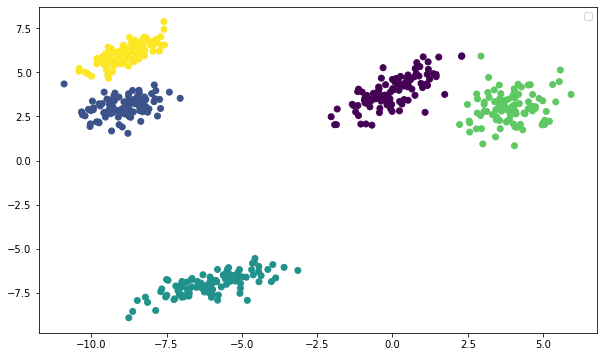

In [45]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)

plt.figure(figsize=(10, 6))
plt.scatter(data[:,0], data[:,1], c= kmeans.labels_)
plt.legend()
plt.show()
